In [1]:
import pandas as pd


csv_path = '../csv/stats_csv_curated/Liver_seg_nnunet_vs_unet_n_615.csv'
bi_fat_df = pd.read_csv(csv_path)
data = bi_fat_df
data_set_list = sorted(list(set(bi_fat_df['data_set'].tolist())))
print(data.shape,'\ndata_set_list:',data_set_list)
data.head()
# unet0 is the 3D U-Net trained on NLST and then applied externally here, without any retraining.
# unet_own means the 3D U-Net retrained on the LIDC-IDRI dataset.

(615, 16) 
data_set_list: ['LIDC_IDRI', 'LUNG1', 'MIDRC-RICORD', 'RIDER', 'VESSEL12', 'covid_china', 'covid_italy']


,data_set,CT_id,manual_select_roi,manual_hs,dsc_nn-unet,jc_nn-unet,assd_nn-unet,hd_nn-unet,dsc_unet0,jc_unet0,assd_unet0,hd_unet0,dsc_unet_own,jc_unet_own,assd_unet_own,hd_unet_own
0,covid_china,covid_0700,54.7063,0,0.94202,0.89039,1.48508,35.26032,0.95027,0.90526,1.44215,43.78504,0.93410,0.87635,1.65669,33.78417
1,covid_china,covid_0701,59.8407,0,0.95244,0.90921,1.05972,17.46854,0.96660,0.93536,0.74910,10.86692,0.95087,0.90635,1.08472,14.97665
2,covid_china,covid_0702,44.0310,0,0.94929,0.90348,1.10806,16.82914,0.94507,0.89586,1.29067,23.87195,0.93989,0.88660,1.46207,28.78541
3,covid_china,covid_0703,42.0273,0,0.94955,0.90395,1.34365,30.00000,0.95507,0.91401,1.15097,25.08625,0.93955,0.88600,1.41545,20.98690
4,covid_china,covid_0704,56.4772,0,0.95247,0.90925,0.99982,13.75282,0.96068,0.92433,0.93434,16.14683,0.94685,0.89907,1.17600,11.81228


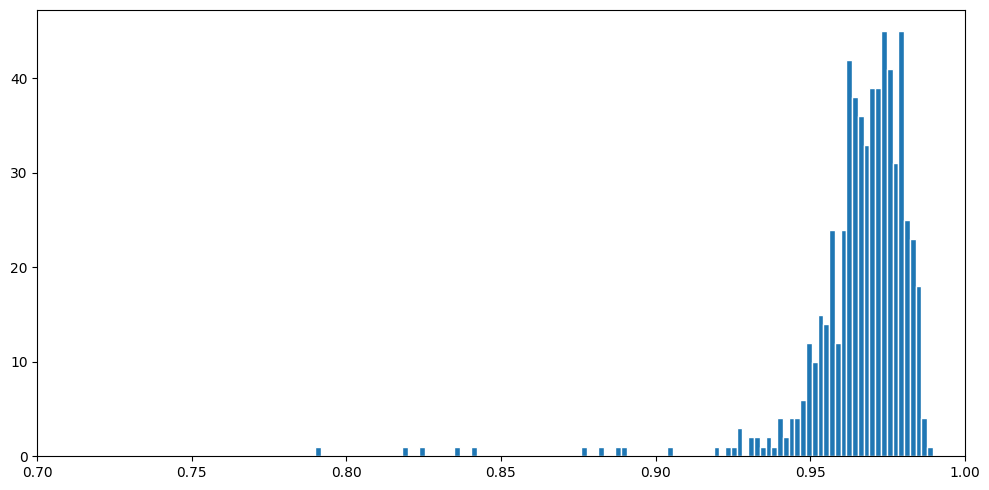

In [2]:
import random
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True
method = 'dsc_nn-unet'

y = data[method]

nbins = 107 
_, _, patches = plt.hist(y, bins=nbins, edgecolor='white')
colors = '#0080FF'
for idx, patch in enumerate(patches):
    if idx> nbins * 0.2:  # 0.75
   
        x = patch.get_x() + patch.get_width() / 2
        y = patch.get_height() + 5
plt.xlim(0.7, 1.0)
plt.show()

In [3]:
metric_list = list(data)[5:9]
metric_list

['jc_nn-unet', 'assd_nn-unet', 'hd_nn-unet', 'dsc_unet0']

In [4]:
import numpy as np

# bi_fat_df = bi_fat_df[bi_fat_df['data_set'] == 'LIDC_IDRI']
fat_df = bi_fat_df[bi_fat_df['manual_select_roi']<40]  
no_fat_df = bi_fat_df[bi_fat_df['manual_select_roi']>=40] 
data = bi_fat_df 

for metric in metric_list:
    
    fat_dsc = fat_df[metric]
    normal_dsc = no_fat_df[metric]
    all_dsc = data[metric]

    print(metric)
    print('Total amount:', len(all_dsc), '|||mean:',np.mean(all_dsc), 'std: ',np.std(all_dsc))
    print('normal amount:', len(normal_dsc), '|||mean:',np.mean(normal_dsc), 'std: ',np.std(normal_dsc))
    print('fat amount:', len(fat_dsc),  '|||mean:',np.mean(fat_dsc), 'std: ',np.std(fat_dsc))
    print()

jc_nn-unet
Total amount: 615 |||mean: 0.9351682601626018 std:  0.03284666498120623
normal amount: 551 |||mean: 0.9365671143375681 std:  0.03292187201280051
fat amount: 64 |||mean: 0.923125 std:  0.029570802216882786

assd_nn-unet
Total amount: 615 |||mean: 1.027683593495935 std:  2.3894154257740032
normal amount: 551 |||mean: 0.999271288566243 std:  2.4993637778323596
fat amount: 64 |||mean: 1.27229578125 std:  1.0074066238286132

hd_nn-unet
Total amount: 615 |||mean: 19.06681365853659 std:  32.36663813358253
normal amount: 551 |||mean: 18.499615335753177 std:  33.60061743368654
fat amount: 64 |||mean: 23.95003671875 std:  17.89305270904203

dsc_unet0
Total amount: 615 |||mean: 0.9496756260162602 std:  0.05632359399526155
normal amount: 551 |||mean: 0.953295952813067 std:  0.04977365005766715
fat amount: 64 |||mean: 0.9185068750000001 std:  0.08983839222937695



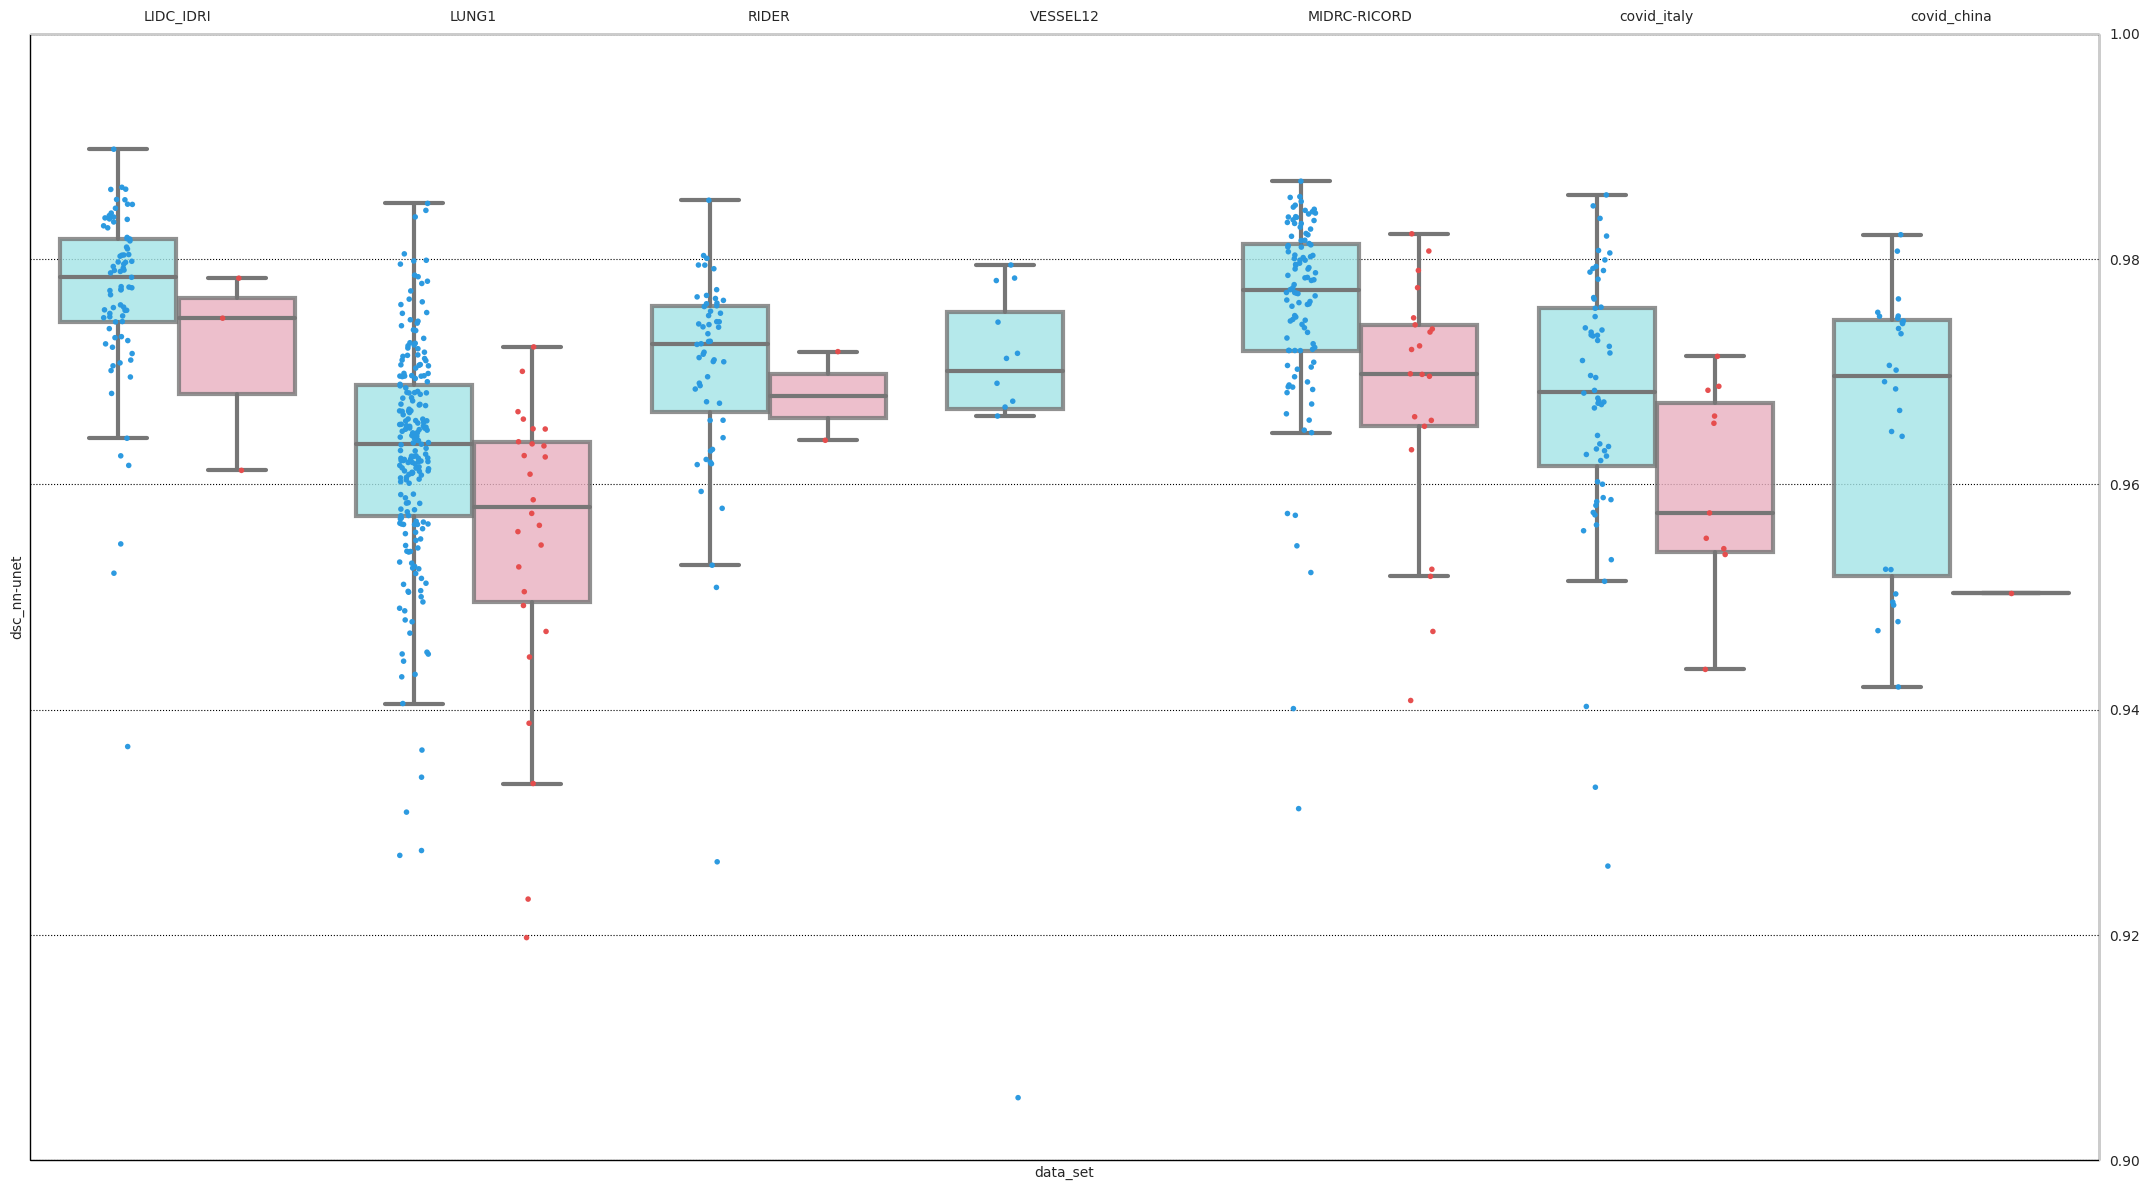

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 

# sns.set(rc={"figure.figsize":(10, 10)}) #width=3, #height=4
data_set_col = 'data_set'
dice_col = 'dsc_nn-unet'
plt_order = ['LIDC_IDRI','LUNG1', 'RIDER','VESSEL12',\
                        'MIDRC-RICORD','covid_italy','covid_china']

sns.set_style( 'whitegrid',{"grid.color": ".0", "grid.linestyle": ":"})
ax = sns.catplot(x= data_set_col, y= dice_col, data=bi_fat_df, hue='manual_hs',
              kind="box", order = plt_order,  height=12, aspect= 1.8,showfliers = False,  \
                                  boxprops=dict(alpha=.8),      
                 linewidth = 3,                  
                   palette=sns.color_palette(['#98eff1ff', '#f2a7bcff']),  legend = False)


ax = sns.stripplot(x= data_set_col, y= dice_col,data=bi_fat_df, hue='manual_hs',order = plt_order,                    
                            jitter=True,
                            dodge=True, 
                   palette=sns.color_palette(['#2a99e0ff', '#e64d4dff']),                   
                            alpha=0.99,size= 4
                            )
ax.get_legend().remove()
ax.patch.set_edgecolor('black')  
sns.despine(top=False, right=False, left=True, bottom=True)


ax.patch.set_linewidth('1') 
plt.ylim(0.9,1.00)
# plt.savefig('figures_in_png/dice_nnunet_615.png', dpi = 360)

In [8]:
# compare the difference between the DSC on normal liver and DSC on steatosis liver.
import numpy as np
from scipy import stats

metric_list = ['dsc_nn-unet']
col_list = sorted(list(set(bi_fat_df['data_set'].tolist())))

for col in col_list:
    print(col,':')
    df_compare = bi_fat_df[bi_fat_df['data_set'] == col]
    
    fat_df = df_compare[df_compare['manual_select_roi']<40] 
    no_fat_df = df_compare[df_compare['manual_select_roi']>=40] 
    data = df_compare
    
    for metric in metric_list:

        fat_dsc = fat_df[metric]
        normal_dsc = no_fat_df[metric]
        all_dsc = data[metric]    
    
    if len(fat_dsc) >0:
        ks_s, ks_p = stats.ks_2samp(fat_dsc, normal_dsc)

        if ks_p >0.05:
            print(col, '\t\t:ks_p_value',ks_p,' Not Significant \n')
        elif ks_p < 0.05 and ks_p >=0.01:
            print(col, '\t\t:*',ks_p,' Significant \n')
        elif ks_p < 0.01 and ks_p >=0.001:
            print(col, '\t\t:**',ks_p,' Significant \n')
        elif ks_p < 0.001 :
            print(col, '\t\t:***',ks_p,' Significant \n')            


LIDC_IDRI :
LIDC_IDRI 		:ks_p_value 0.34588607594936716  Not Significant 

LUNG1 :
LUNG1 		:ks_p_value 0.054195696157246176  Not Significant 

MIDRC-RICORD :
MIDRC-RICORD 		:** 0.0015325663976805126  Significant 

RIDER :
RIDER 		:ks_p_value 0.4736842105263158  Not Significant 

VESSEL12 :
covid_china :
covid_china 		:ks_p_value 0.5517241379310345  Not Significant 

covid_italy :
covid_italy 		:* 0.043026561591739454  Significant 

